> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I have chosen to look at the TMDB dataset. This data was provided as part of the Udacity Data Analysis Nanodegree and originated from Kaggle.

Questions:

1. What are the top 10 movies by revenues?
2. What are the top 10 movies by budget?
3. What are the top 10 movies by net profit?
4. What are the top 10 movies by popularity?
5. What are the top 10 years by the number of movies?
6. What are the top 10 movies by vote average?
7. What are the Longest 10 movies?
8. What are the top 10 directors by the number of movies?

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [135]:
dataset = pd.read_csv('tmdb-movies.csv')

In [96]:
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [97]:
dataset.shape

(10866, 21)

In [98]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa34b620da0>,
      dtype=object)

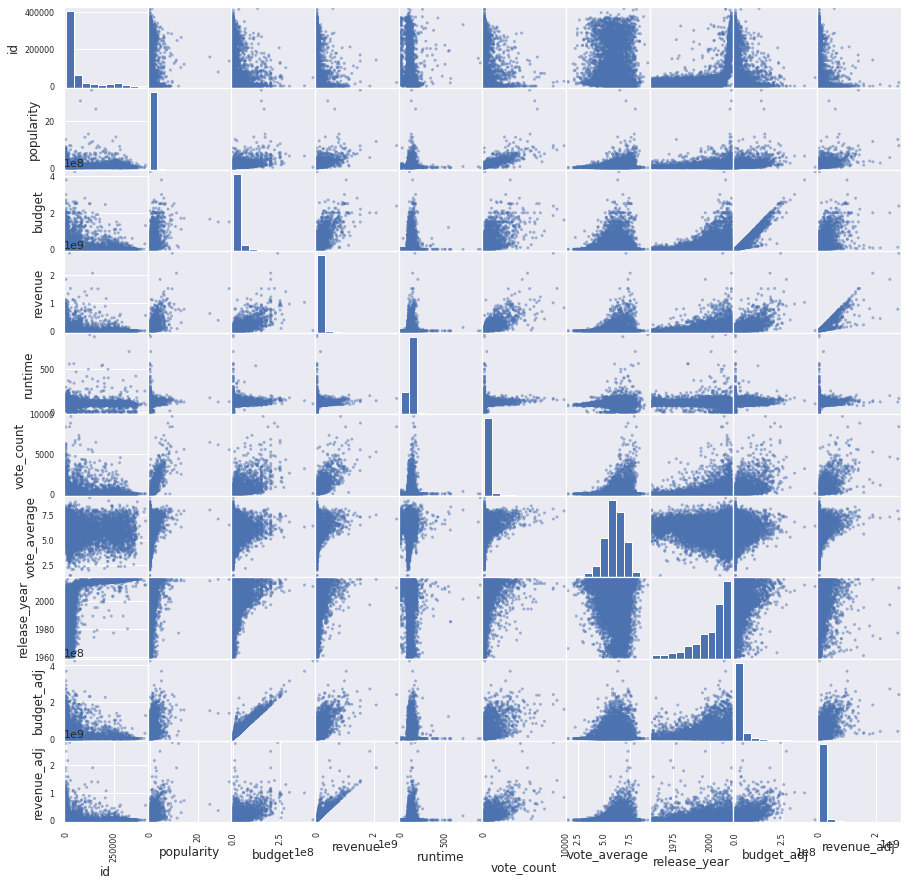

In [100]:
pd.plotting.scatter_matrix(dataset, figsize=(15, 15))

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

Remove duplicates

In [101]:
dataset.drop_duplicates(inplace=True)

Change the release date column to datetime type

In [102]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Top 10 Movies by Revenues

In [104]:
df1 = dataset[['original_title', 'revenue']].sort_values(by=['revenue'], ascending=False).head(10)

In [105]:
df1

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


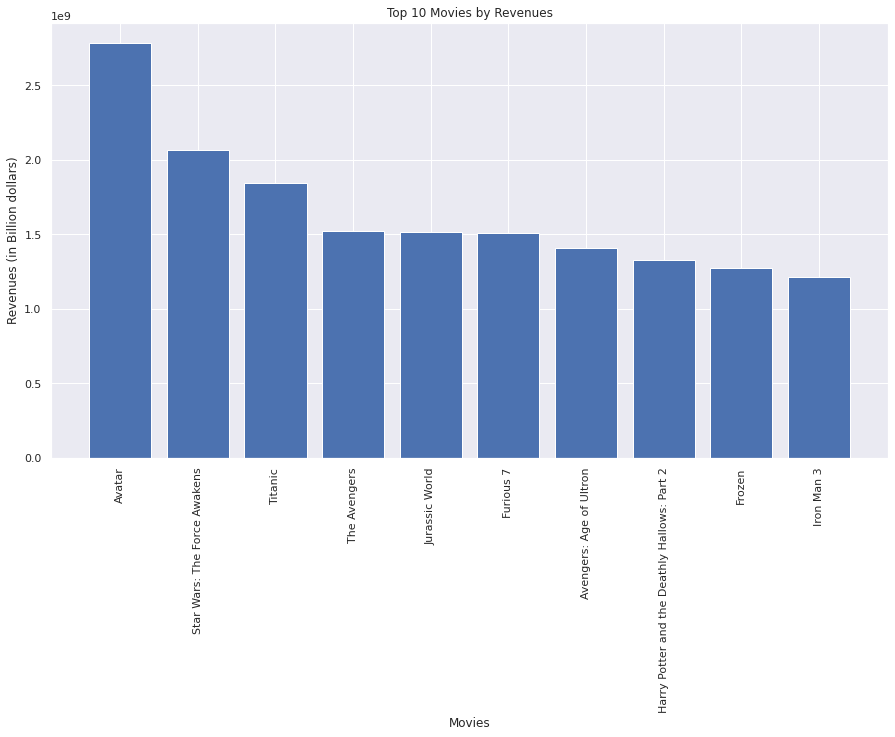

In [106]:
fig = plt.figure(figsize = (15, 8)) 
plt.bar(df1['original_title'], df1['revenue']) 
plt.xlabel("Movies") 
plt.ylabel("Revenues (in Billion dollars)") 
plt.xticks(rotation=90)
plt.title("Top 10 Movies by Revenues") 
plt.show() 

### Research Question 2: Top 10 Movies by Budget

In [107]:
df2 = dataset[['original_title', 'budget']].sort_values(by=['budget'], ascending=False).head(10)

In [108]:
df2

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
4367,The Hobbit: An Unexpected Journey,250000000


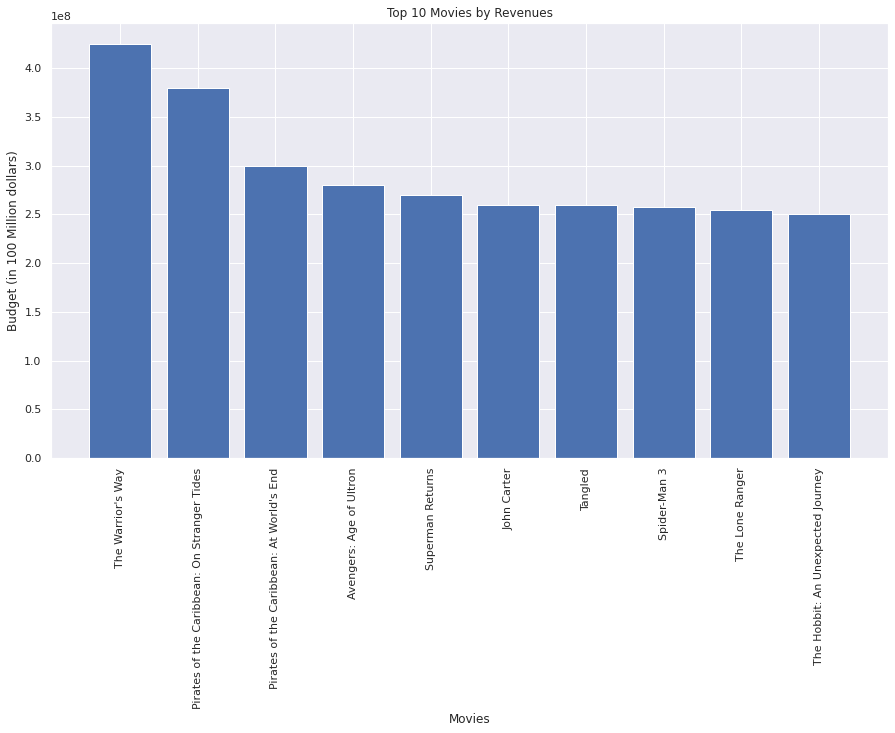

In [109]:
fig = plt.figure(figsize = (15, 8)) 
plt.bar(df2['original_title'], df2['budget']) 
plt.xlabel("Movies") 
plt.ylabel("Budget (in 100 Million dollars)") 
plt.xticks(rotation=90)
plt.title("Top 10 Movies by Revenues") 
plt.show() 

### Research Question 3: Top 10 Movies by Net Profit (Revenues - Budget)

In [126]:
df8 = dataset[['original_title', 'revenue', 'budget']]

In [127]:
df8

,original_title,revenue,budget
0,Jurassic World,1513528810,150000000
1,Mad Max: Fury Road,378436354,150000000
2,Insurgent,295238201,110000000
3,Star Wars: The Force Awakens,2068178225,200000000
4,Furious 7,1506249360,190000000
...,...,...,...
10861,The Endless Summer,0,0
10862,Grand Prix,0,0
10863,Beregis Avtomobilya,0,0
10864,"What's Up, Tiger Lily?",0,0


In [128]:
df8['profit'] = df8['revenue'] - df8['budget']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
df8

,original_title,revenue,budget,profit
0,Jurassic World,1513528810,150000000,1363528810
1,Mad Max: Fury Road,378436354,150000000,228436354
2,Insurgent,295238201,110000000,185238201
3,Star Wars: The Force Awakens,2068178225,200000000,1868178225
4,Furious 7,1506249360,190000000,1316249360
...,...,...,...,...
10861,The Endless Summer,0,0,0
10862,Grand Prix,0,0,0
10863,Beregis Avtomobilya,0,0,0
10864,"What's Up, Tiger Lily?",0,0,0


In [130]:
df8.sort_values(by=['profit'], ascending=False).head(10)

,original_title,revenue,budget,profit
1386,Avatar,2781505847,237000000,2544505847
3,Star Wars: The Force Awakens,2068178225,200000000,1868178225
5231,Titanic,1845034188,200000000,1645034188
0,Jurassic World,1513528810,150000000,1363528810
4,Furious 7,1506249360,190000000,1316249360
4361,The Avengers,1519557910,220000000,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822,125000000,1202817822
14,Avengers: Age of Ultron,1405035767,280000000,1125035767
5422,Frozen,1274219009,150000000,1124219009
8094,The Net,1106279658,22000000,1084279658


In [131]:
df8 = df8.sort_values(by=['profit'], ascending=False).head(10)

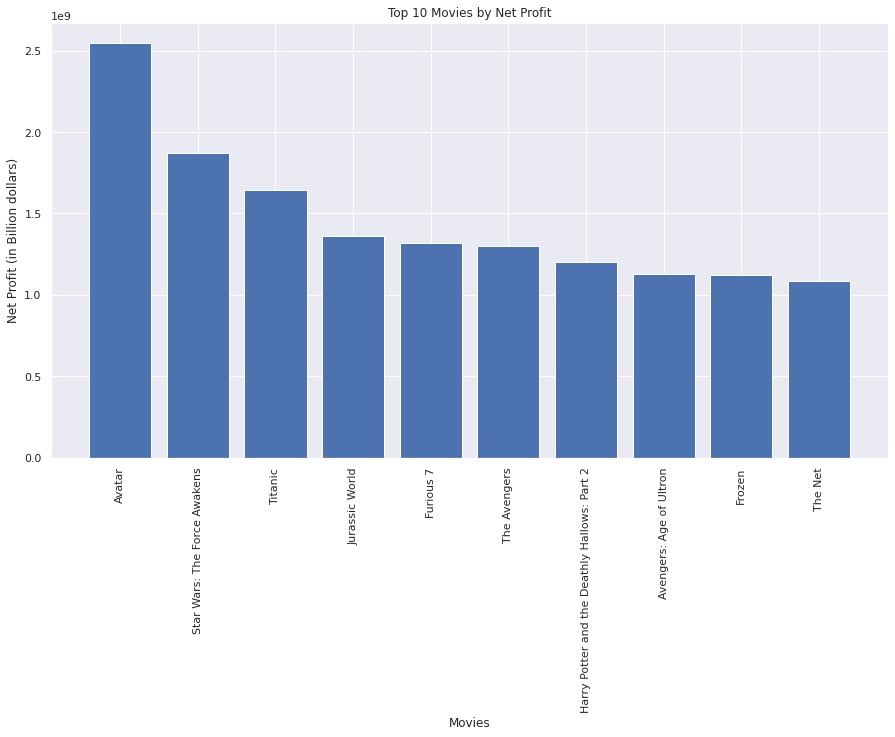

In [138]:
fig = plt.figure(figsize = (15, 8)) 
plt.bar(df8['original_title'], df8['profit']) 
plt.xlabel("Movies") 
plt.ylabel("Net Profit (in Billion dollars)")
plt.xticks(rotation=90)
plt.title("Top 10 Movies by Net Profit") 
plt.show() 

### Research Question 4: Top 10 Movies by Popularity

In [110]:
df3 = dataset[['original_title', 'popularity']].sort_values(by=['popularity'], ascending=False).head(10)

In [111]:
df3

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


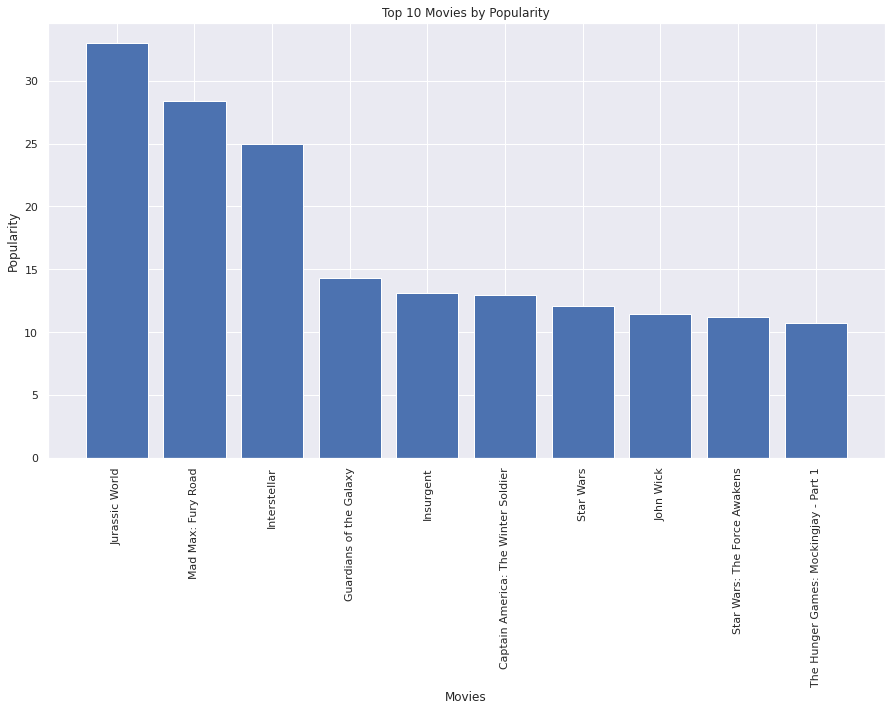

In [112]:
fig = plt.figure(figsize = (15, 8)) 
plt.bar(df3['original_title'], df3['popularity']) 
plt.xlabel("Movies") 
plt.ylabel("Popularity") 
plt.xticks(rotation=90)
plt.title("Top 10 Movies by Popularity") 
plt.show() 

### Research Question 5: Top 10 years by the number of movies

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [114]:
df4 = dataset['release_year'].value_counts()

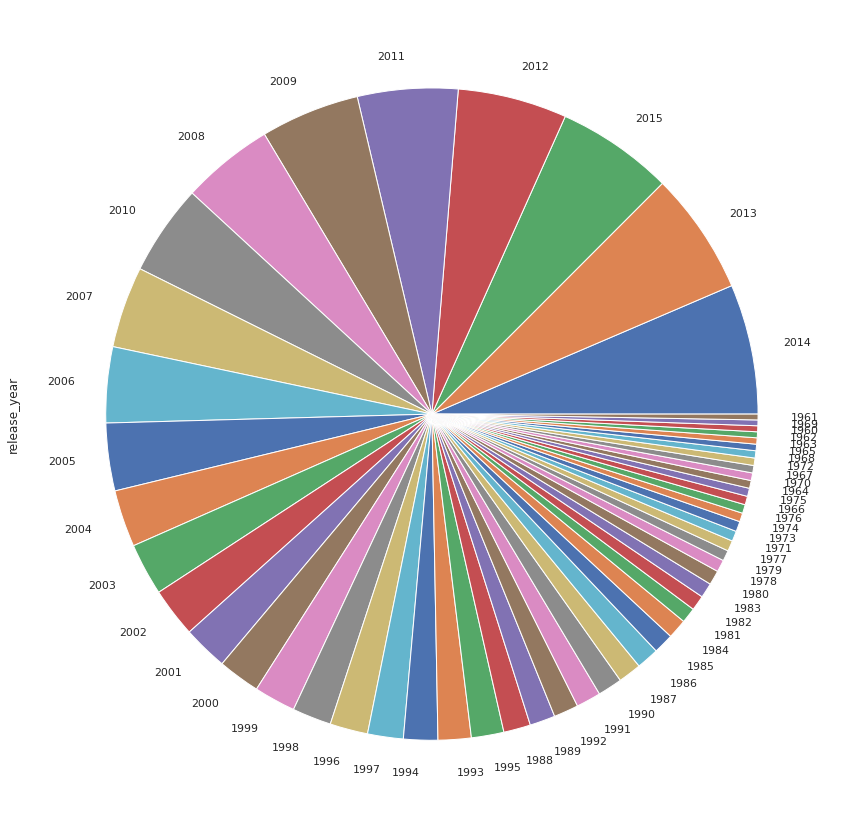

In [115]:
df4.plot(kind='pie', figsize=(15, 15))

Text(0.5, 1.0, 'Top 10 years by the number of movies')

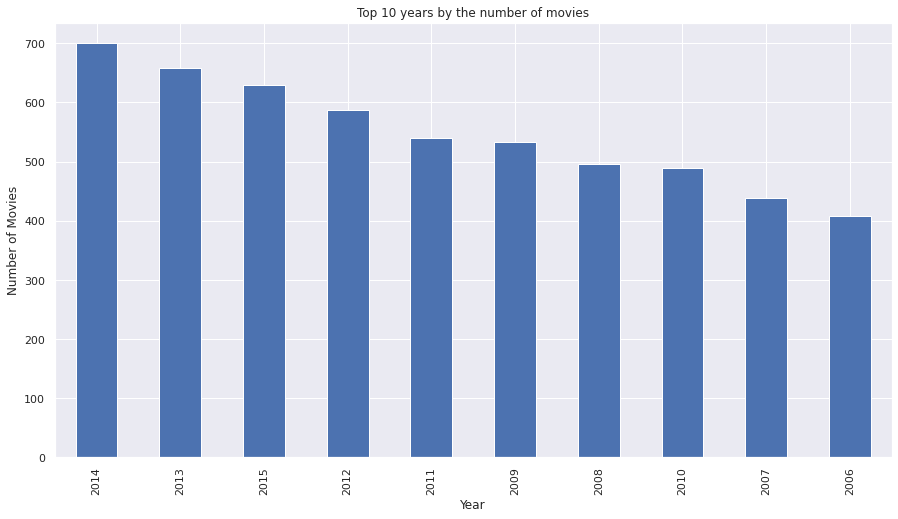

In [136]:
ax = df4.head(10).plot(kind='bar', figsize=(15, 8))
ax.set_xlabel("Year")
ax.set_ylabel('Number of Movies')
ax.set_title('Top 10 years by the number of movies')

### Research Question 6: Top 10 Movies by Vote Average

In [117]:
df5 = dataset[['original_title', 'vote_average']].sort_values(by=['vote_average'], ascending=False).head(10)

In [118]:
df5

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5


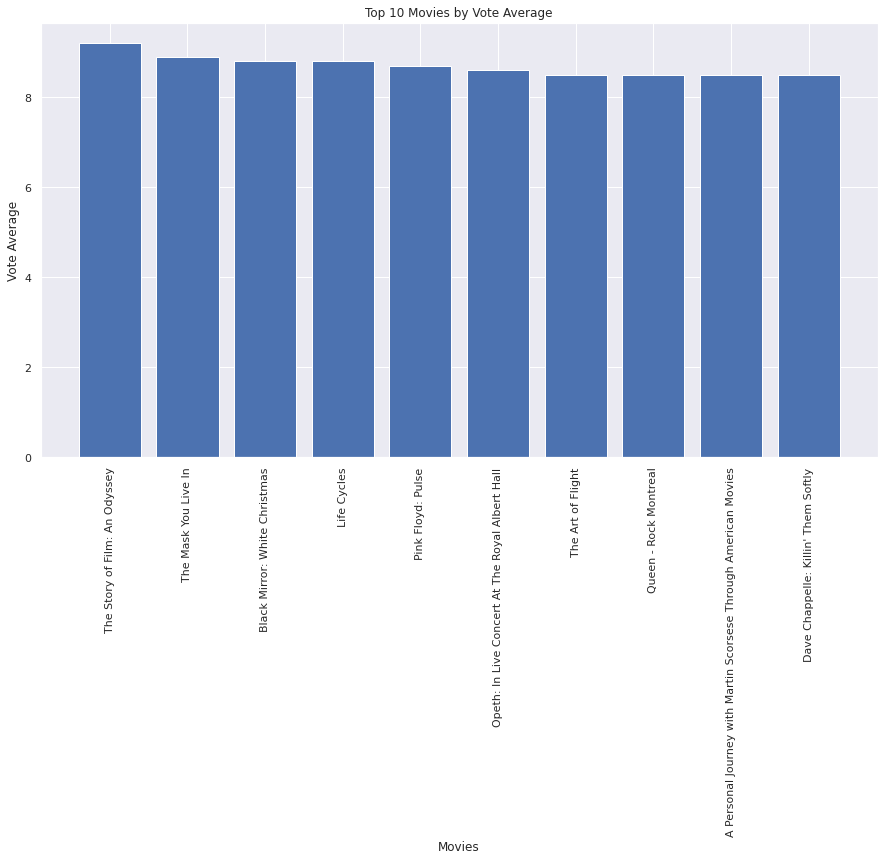

In [119]:
fig = plt.figure(figsize = (15, 8)) 
plt.bar(df5['original_title'], df5['vote_average']) 
plt.xlabel("Movies") 
plt.ylabel("Vote Average")
plt.xticks(rotation=90)
plt.title("Top 10 Movies by Vote Average") 
plt.show() 

### Research Question 7: The Longest 10 Movies

In [120]:
df6 = dataset[['original_title', 'runtime']].sort_values(by=['runtime'], ascending=False).head(10)

In [121]:
df6

,original_title,runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6181,"North and South, Book I",561
6894,Planet Earth,550
2214,The Pacific,540
3356,John Adams,501
1865,Life,500
3141,Generation Kill,470


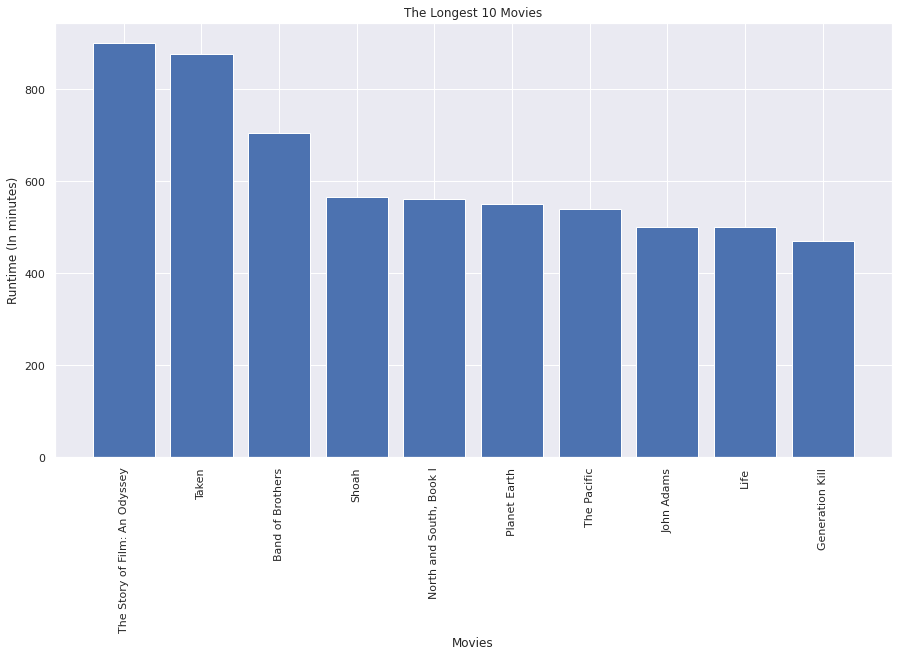

In [139]:
fig = plt.figure(figsize = (15, 8)) 
plt.bar(df6['original_title'], df6['runtime']) 
plt.xlabel("Movies") 
plt.ylabel("Runtime (In minutes)")
plt.xticks(rotation=90)
plt.title("The Longest 10 Movies") 
plt.show() 

### Research Question 8: Top 10 Directors by the Number of Movies

In [123]:
df7 = dataset['director'].value_counts().head(10)

In [124]:
df7

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

Text(0.5, 1.0, 'Top 10 Directors by the Number of Movies')

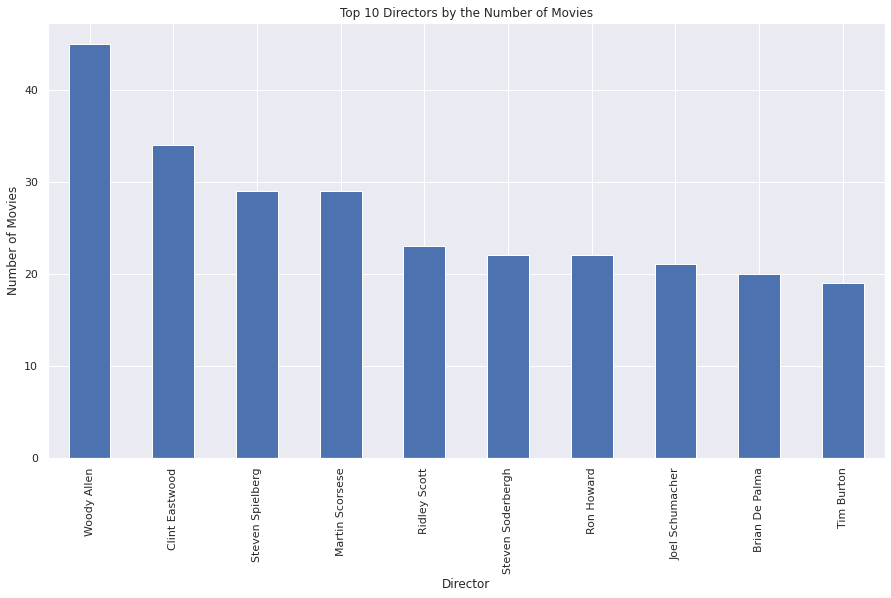

In [140]:
ax = df7.head(10).plot(kind='bar', figsize=(15, 8))
ax.set_xlabel("Director")
ax.set_ylabel('Number of Movies')
ax.set_title('Top 10 Directors by the Number of Movies')

<a id='conclusions'></a>
## Conclusions

> **Reasearch Question 1**: Top 10 Movies by Revenues<br>


| Order      | Movie | Revenue |
| ----------- | ----------- |-----------:|
| 1st | Avatar | 2,781,505,847 |
| 2nd | Star Wars: The Force Awakens | 2,068,178,225 |
| 3rd | Titanic | 1,845,034,188 |
| 4th | The Avengers | 1,519,557,910 |
| 5th | Jurassic World | 1,513,528,810 |
| 6th | Furious 7 | 1,506,249,360 |
| 7th | Avengers: Age of Ultron | 1,405,035,767 |
| 8th | Harry Potter and the Deathly Hallows: Part 2 | 1,327,817,822 |
| 9th | Frozen | 1,274,219,009 |
| 10th | Iron Man 3 | 	1,215,439,994 |

> **Reasearch Question 2**: Top 10 Movies by Budget<br>


| Order      | Movie | Budget |
| ----------- | ----------- |-----------:|
| 1st | The Warrior's Way | 425,000,000 |
| 2nd | Pirates of the Caribbean: On Stranger Tides | 380,000,000 |
| 3rd | Pirates of the Caribbean: At World's End | 300,000,000 |
| 4th | Avengers: Age of Ultron | 280,000,000 |
| 5th | Superman Returns | 270,000,000 |
| 6th | John Carter | 260,000,000 |
| 7th | Tangled | 260,000,000 |
| 8th | Spider-Man 3 | 258,000,000 |
| 9th | The Lone Ranger | 255,000,000 |
| 10th | The Hobbit: An Unexpected Journey | 	250,000,000 |

> **Reasearch Question 3**: Top 10 Movies by Net Profit (Revenues - Budget)<br>


| Order      | Movie | Net Profit |
| ----------- | ----------- |-----------:|
| 1st | Avatar | 2,544,505,847 |
| 2nd | Star Wars: The Force Awakens | 1,868,178,225 |
| 3rd | Titanic | 1,645,034,188 |
| 4th | Jurassic World | 1,363,528,810 |
| 5th | Furious 7 | 1,316,249,360 |
| 6th | The Avengers | 1,299,557,910 |
| 7th | Harry Potter and the Deathly Hallows: Part 2 | 1,202,817,822 |
| 8th | Avengers: Age of Ultron | 1,125,035,767 |
| 9th | Frozen | 1,124,219,009 |
| 10th | The Net | 	1,084,279,658 |


> **Reasearch Question 4**: Top 10 Movies by Popularity<br>


| Order      | Movie | Popularity |
| ----------- | ----------- |-----------:|
| 1st | Jurassic World | 32.985763 |
| 2nd | Mad Max: Fury Road | 28.419936 |
| 3rd | Interstellar | 24.949134 |
| 4th | Guardians of the Galaxy | 14.311205 |
| 5th | Insurgent | 13.112507 |
| 6th | Captain America: The Winter Soldier | 12.971027 |
| 7th | Star Wars | 12.037933 |
| 8th | John Wick | 11.422751 |
| 9th | Star Wars: The Force Awakens | 11.173104 |
| 10th | The Hunger Games: Mockingjay - Part 1 | 10.739009 |


> **Reasearch Question 5**: Top 10 years by the number of movies<br>


| Order      | Year | Number of Movies |
| ----------- | ----------- |-----------:|
| 1st | 2014 | 700 |
| 2nd | 2013 | 659 |
| 3rd | 2015 | 629 |
| 4th | 2012 | 588 |
| 5th | 2011 | 540 |
| 6th | 2009 | 533 |
| 7th | 2008 | 496 |
| 8th | 2010 | 490 |
| 9th | 2007 | 438 |
| 10th | 2006 | 408 |


> **Reasearch Question 6**: Top 10 Movies by Vote Average<br>


| Order      | Movie | Revenue |
| ----------- | ----------- |-----------:|
| 1st |The Story of Film: An Odyssey |	9.2 |
| 2nd |The Mask You Live In |	8.9 |
| 3rd |Black Mirror: White Christmas |	8.8 |
| 4th |Life Cycles |	8.8 |
| 5th |Pink Floyd: Pulse |	8.7 |
| 6th | Opeth: In Live Concert At The Royal Albert Hall |	8.6 |
| 7th | The Art of Flight |	8.5 |
| 8th | Queen - Rock Montreal |	8.5 |
| 9th | A Personal Journey with Martin Scorsese Throug... |	8.5 |
| 10th |Dave Chappelle: Killin' Them Softly |	8.5 |


> **Reasearch Question 7**: The Longest 10 Movies<br>


| Order      | Movie | Runtime |
| ----------- | ----------- |-----------:|
| 1st |The Story of Film: An Odyssey| 900 |
| 2nd |Taken| 877 |
| 3rd |Band of Brothers| 705 |
| 4th |Shoah| 566 |
| 5th |North and South, Book I| 561 |
| 6th |Planet Earth| 550 |
| 7th | The Pacific| 540 |
| 8th |John Adams| 501 |
| 9th |Life| 500 |
| 10th |Generation Kill| 470 |


> **Reasearch Question 8**: Top 10 Directors by the Number of Movies<br>


| Order      | Director | Number of Movies |
| ----------- | ----------- |-----------:|
| 1st |Woody Allen       | 45 |
| 2nd |Clint Eastwood    | 34 |
| 3rd |Steven Spielberg  | 29 |
| 4th |Martin Scorsese   | 29 |
| 5th |Ridley Scott      | 23 |
| 6th |Steven Soderbergh | 22 |
| 7th |Ron Howard        | 22 |
| 8th |Joel Schumacher   | 21 |
| 9th |Brian De Palma    | 20 |
| 10th |Tim Burton        | 19 |

In [133]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255